# Assignment 7 : Hackathon (Loan Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

**Import And Read The Data Make Data Frame**

In [2]:
file_path=r'C:\Users\SHRI\Documents\DS\Data_files\loan_data.csv'
lndf=pd.read_csv(file_path)
lndf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Drop The ID Column**

In [3]:
lndf.drop(columns='Loan_ID',  inplace=True)
lndf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Find The Null Values Of Each Column**

In [5]:
pd.isnull(lndf).sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
cat=lndf.select_dtypes(include='object').columns

In [7]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
for i in cat:
    lndf[i].fillna(lndf[i].mode()[0], inplace=True)

In [9]:
lndf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
lndf['Dependents']=lndf['Dependents'].replace('3+', '3').astype(int)
lndf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
cat=lndf.select_dtypes(include='object').columns

In [12]:
cat

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [13]:
num=lndf.select_dtypes(exclude='object').columns

In [14]:
num

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [15]:
for i in num:
    lndf[i].fillna(lndf[i].median(), inplace=True)

In [19]:
pd.isnull(lndf).sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
lndf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Categorical Column Analysis**

In [21]:
for i in cat:
    print(lndf[i].value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


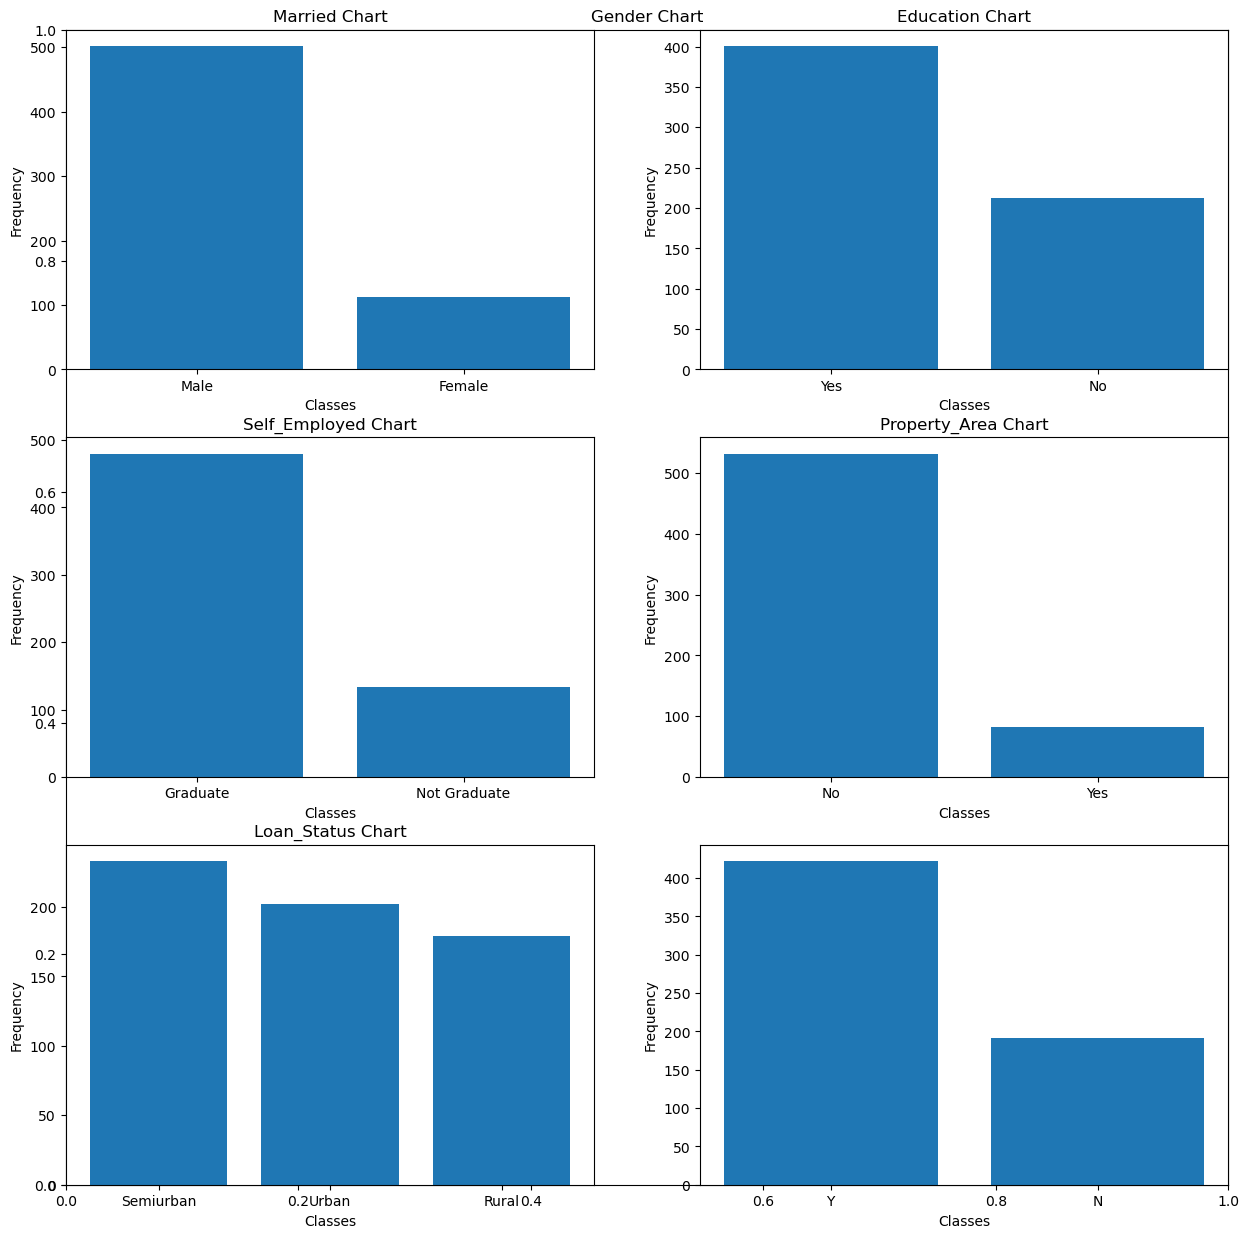

In [22]:
plt.figure(figsize=(15,15))
for i,j in enumerate(cat):
    keys=lndf[j].value_counts().keys()
    values=lndf[j].value_counts().values
    plt.title(f'{j} Chart')
    plt.subplot(3,2,i+1)
    plt.bar(keys,values)
    plt.xlabel('Classes')
    plt.ylabel('Frequency')

**Categorical VS Target**

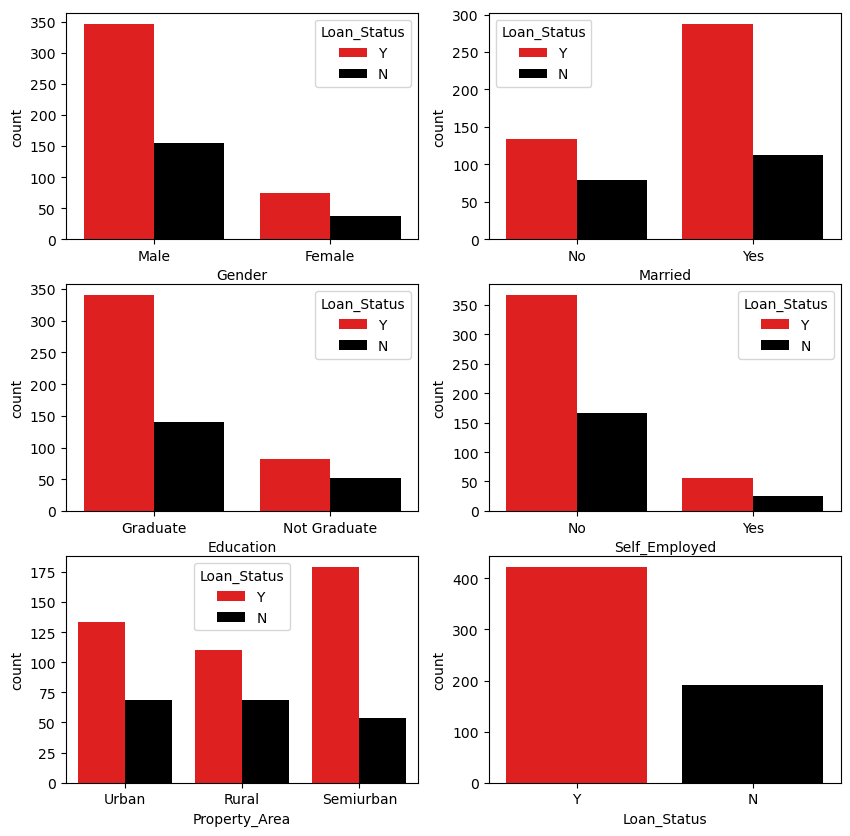

In [23]:
plt.figure(figsize=(10,10))
for i,j in enumerate(cat):
    plt.subplot(3,2,i+1)
    sns.countplot(data=lndf, x=j, hue='Loan_Status', palette=['red', 'black'])


**Numerical Column Analysis**

In [24]:
num_df=lndf[num]
num_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


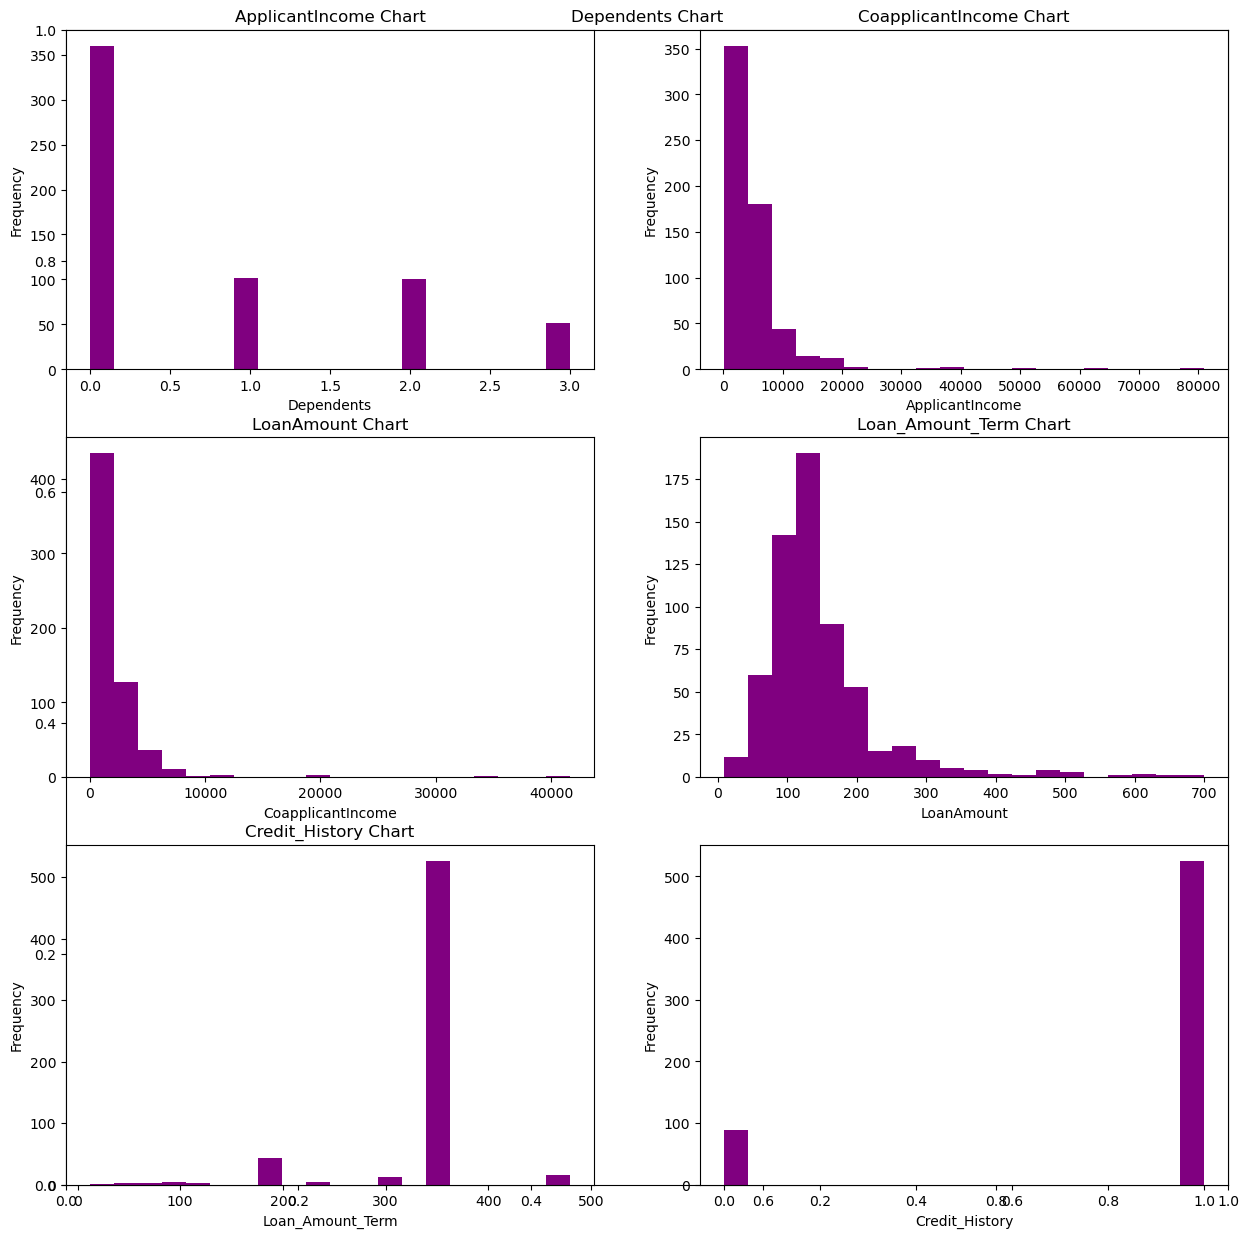

In [25]:
plt.figure(figsize=(15,15))
for i,j in enumerate(num):
    plt.title(f'{j} Chart')
    plt.subplot(3,2,i+1)
    plt.hist(lndf[j],  bins=20, color='Purple')
    plt.xlabel(j)
    plt.ylabel('Frequency')

**Numerical Target**

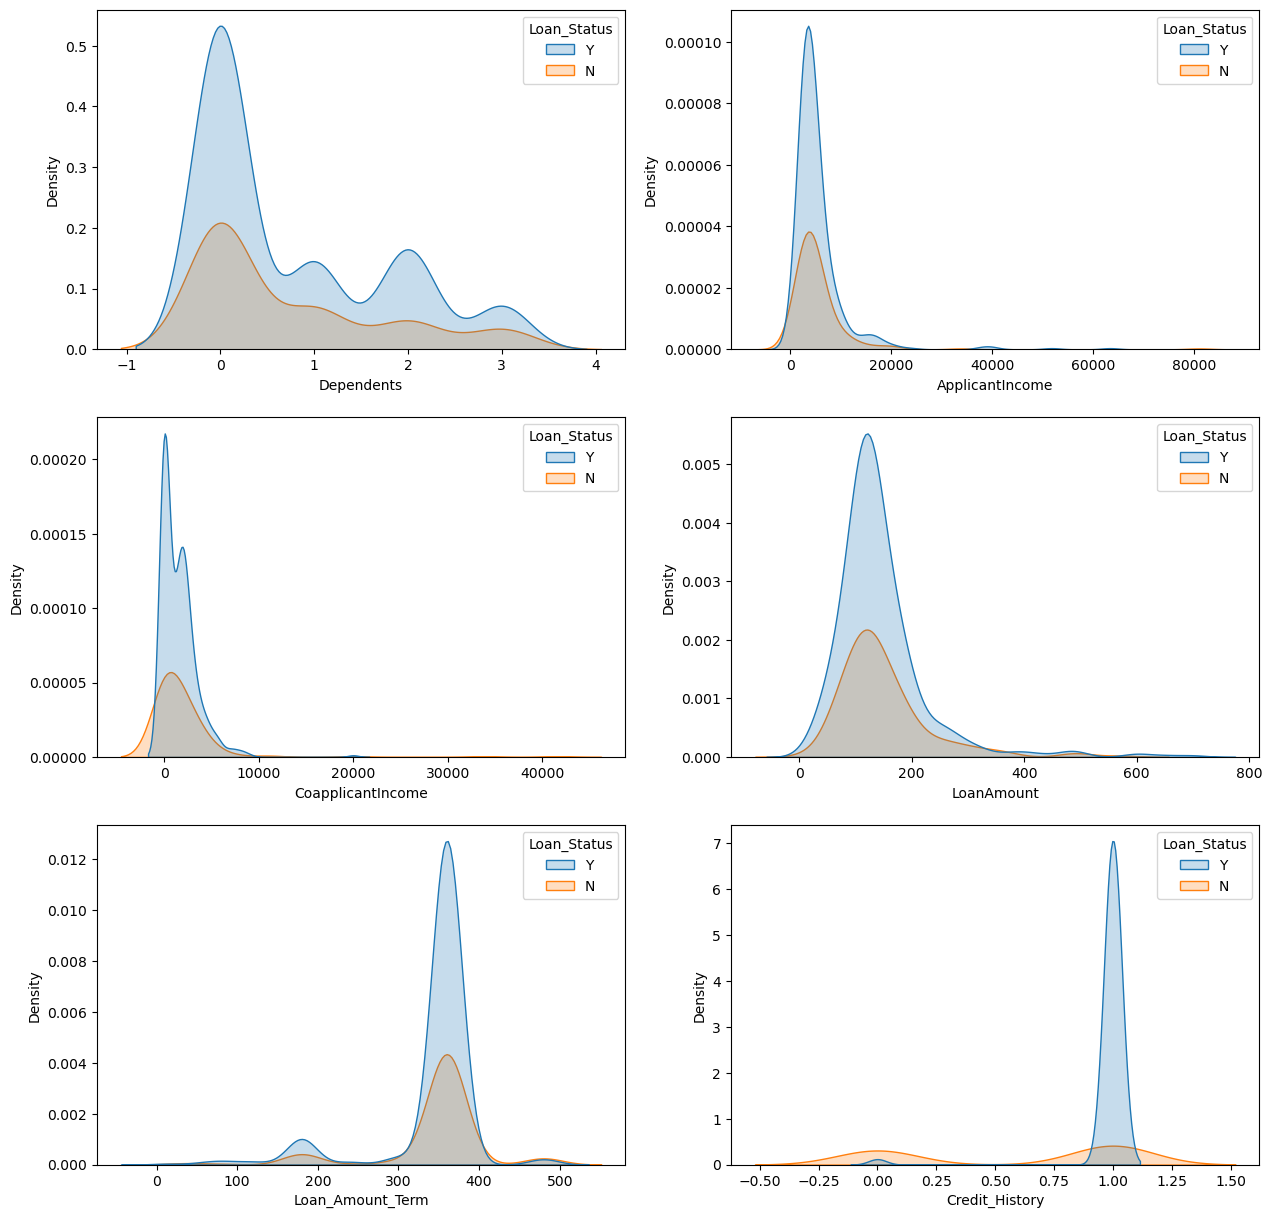

In [26]:
plt.figure(figsize=(15,15))
for i,j in enumerate(num):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=lndf, x=j, hue='Loan_Status', fill=True)

**Box Plot For Numerical Columns**

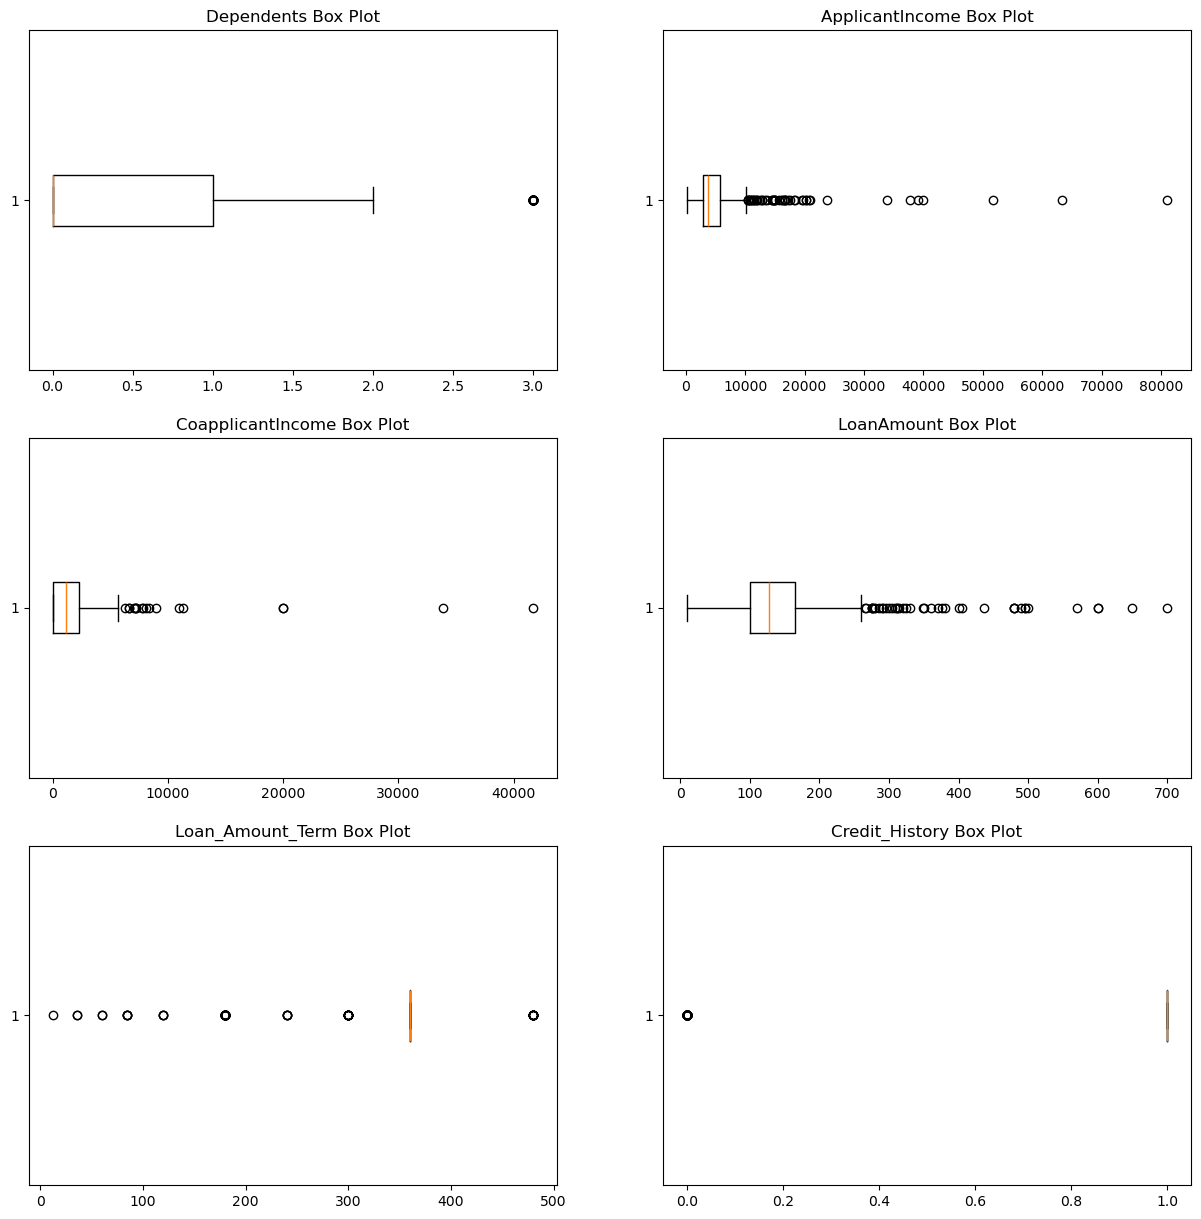

In [27]:
plt.figure(figsize=(15,15))
for i,j in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.boxplot(lndf[j], vert=False)
    plt.title(f'{j} Box Plot')

**There are several outliers present in the data**

**Outliers Analysis**

In [28]:
ourlier_count={}
for i in num:
    data=lndf[i]
    Q1=np.percentile(data,25)
    Q2=np.percentile(data,50)
    Q3=np.percentile(data,75)

    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    con=(data<lower_bound) | (data>upper_bound)
    outliers=data[con].values.tolist()
    ourlier_count[i]=con.sum()
 
print(ourlier_count)

{'Dependents': np.int64(51), 'ApplicantIncome': np.int64(50), 'CoapplicantIncome': np.int64(18), 'LoanAmount': np.int64(41), 'Loan_Amount_Term': np.int64(88), 'Credit_History': np.int64(89)}


**winsorization**

In [38]:
for i in num:
    data=lndf[i]
    Q1=np.percentile(data,25)
    Q2=np.percentile(data,50)
    Q3=np.percentile(data,75)

    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    lndf[i]=np.clip(data,lower_bound,upper_bound)

**Rechecking the outliers using box plot**

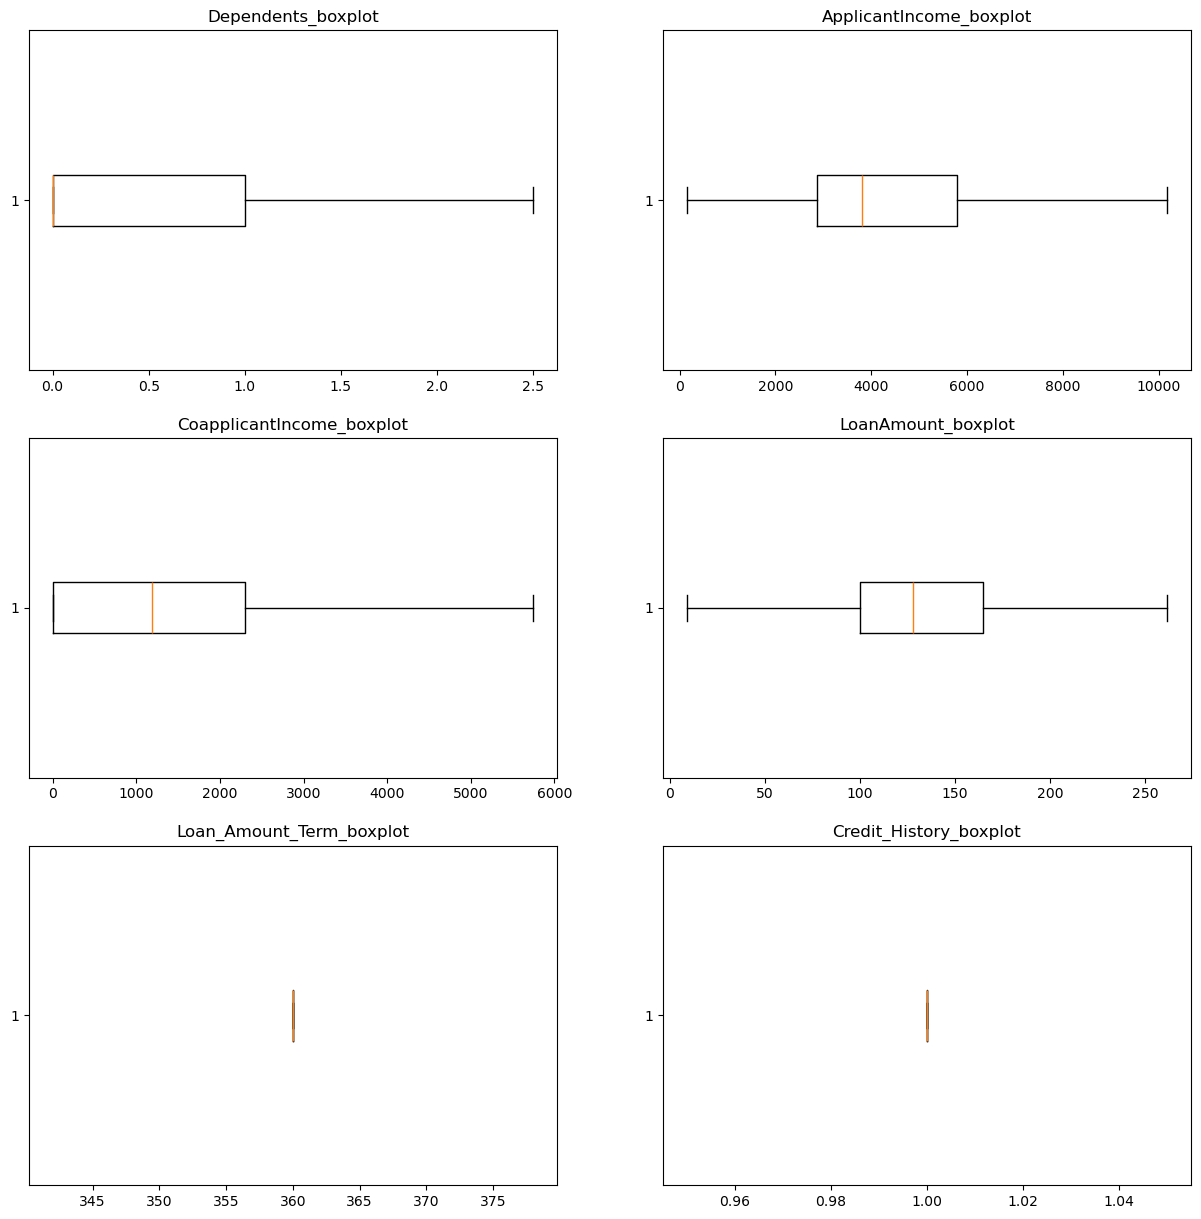

In [39]:
plt.figure(figsize=(15,15))
for i,j in enumerate(num):
    data=lndf[j]
    plt.subplot(3,2,i+1).boxplot(data,vert=False)
    plt.title(f'{j}_boxplot')

**CORRELATION BETWEEN NUMERICAL COLUMNS**

In [29]:
cor_data=lndf.corr(numeric_only=True)

**Heat Map**

<Axes: >

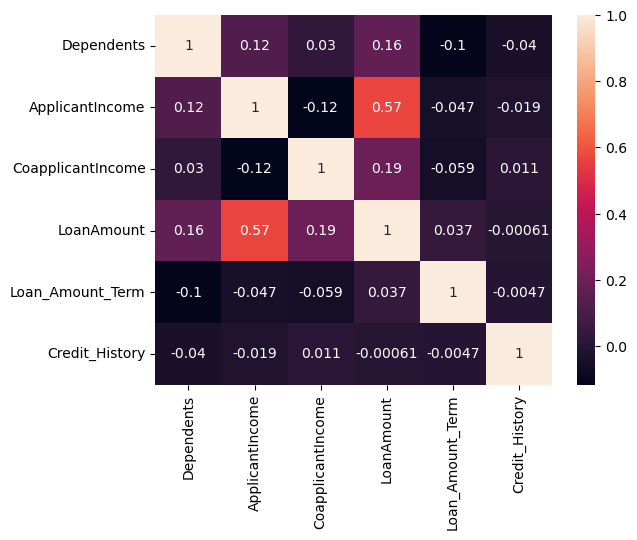

In [30]:
sns.heatmap(cor_data,annot=True)

**Quick chekc for the constant values in the Num data**

- Drop constant columns since they don't impact the model's performance

In [31]:
lndf[['Loan_Amount_Term','Credit_History']].nunique ()

Loan_Amount_Term    10
Credit_History       2
dtype: int64

In [43]:
#lndf.drop(columns=['Loan_Amount_Term','Credit_History'],inplace=True)

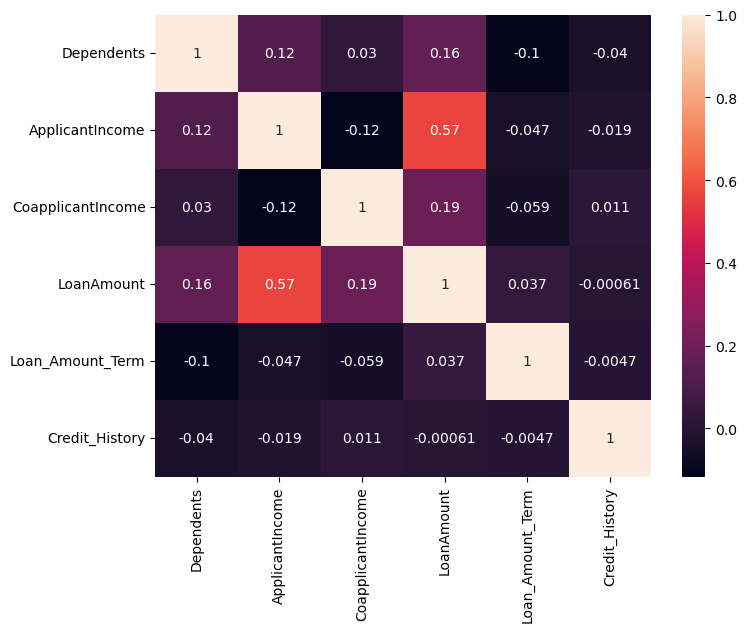

In [32]:
cor_data=lndf.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(cor_data,annot=True)
plt.show()

**One_hot_Encoder**

In [33]:
lndf[cat]

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,Y
610,Male,Yes,Graduate,No,Rural,Y
611,Male,Yes,Graduate,No,Urban,Y
612,Male,Yes,Graduate,No,Urban,Y


In [34]:
for i in cat:
    lndf=pd.get_dummies(lndf,dtype=int)

In [35]:
lndf

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0,0,1
610,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,1


In [37]:
cat=lndf.select_dtypes(include='object').columns
cat

Index([], dtype='object')

**Scaling Data**

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in num:
    scale_data=ss.fit_transform(lndf[[i]])
    lndf[i]=scale_data
lndf    

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,-0.737806,0.072991,-0.554487,-0.211241,0.273231,0.411733,0,1,1,0,1,0,1,0,0,0,1,0,1
1,0.253470,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,1,0,1,1,0,1,0,1,0,0,1,0
2,-0.737806,-0.393747,-0.554487,-0.948996,0.273231,0.411733,0,1,0,1,1,0,0,1,0,0,1,0,1
3,-0.737806,-0.462062,0.251980,-0.306435,0.273231,0.411733,0,1,0,1,0,1,1,0,0,0,1,0,1
4,-0.737806,0.097728,-0.554487,-0.056551,0.273231,0.411733,0,1,1,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.737806,-0.410130,-0.554487,-0.889500,0.273231,0.411733,1,0,1,0,1,0,1,0,1,0,0,0,1
610,2.236021,-0.212557,-0.554487,-1.258378,-2.522836,0.411733,0,1,0,1,1,0,1,0,1,0,0,0,1
611,0.253470,0.437174,-0.472404,1.276168,0.273231,0.411733,0,1,0,1,1,0,1,0,0,0,1,0,1
612,1.244745,0.357064,-0.554487,0.490816,0.273231,0.411733,0,1,0,1,1,0,1,0,0,0,1,0,1
